# Pandas и большие файлы

In [1]:
import pandas as pd

In [188]:
from os.path import expanduser

In [189]:
os.path.expanduser('~')

'/home/rain'

In [138]:
path_for_datasets = ''.join((os.path.expanduser('~'),'/Repositories/Python/datasets/'))
path_for_datasets

'/home/rain/Repositories/Python/datasets/'

### Упражнение
Для каждого пользователя user_id из файла sales_db.csv посчитайте самую дорогую покупку (в столбце cost)

In [2]:
data = pd.read_csv('sales_db.csv')

In [3]:
data

,user_id,category,cost
0,1,Электроника,87
1,1,Дача,10
2,1,Дети,2
3,1,Дача,199
4,2,Авто,3
5,2,Авто,35
6,3,Дети,8
7,9,Дети,17


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   8 non-null      int64 
 1   category  8 non-null      object
 2   cost      8 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [8]:
data.user_id.nunique()

4

In [7]:
data.groupby('user_id').max()

,category,cost
user_id,,
1,Электроника,199
2,Авто,35
3,Дети,8
9,Дети,17


In [10]:
data.groupby('user_id').agg({'cost':'max'})

,cost
user_id,
1,199
2,35
3,8
9,17


In [18]:
# first version
previous_user = None
cost_max_users = []

l_max = -1  # l_max = None
with open('/home/rain/Repositories/Python/15.pandas_optomize_2/sales_db.csv') as f:
    f.readline()

    for i, line in enumerate(f):
        user_id, category, cost = line.strip().split(',')
        cost = int(cost)
        print(user_id, cost)

        if previous_user is not None:
            if previous_user == user_id:
                if cost > l_max:
                    l_max = cost
                    print(l_max)
            else:
                cost_max_users.append(l_max)
                previous_user = user_id
                l_max = -1
                if cost > l_max:
                    l_max = cost
                    print(l_max)
        else:
            l_max = -1
            previous_user = user_id
            if cost > l_max:
                l_max = cost
                print(l_max)
        if i > 5:
            break

print(cost_max_users)

1 87
87
1 10
1 2
1 199
199
2 3
3
2 35
35
3 8
8
[199, 35]


In [28]:
#version 1.1
previous_user = None
cost_max_users = []

l_max = -1  # l_max = None
with open('sales_db.csv') as f:
    f.readline()

    for i, line in enumerate(f):
        user_id, category, cost = line.strip().split(',')
        cost = int(cost)
        print(user_id, cost)

        if previous_user is not None:
            if previous_user == user_id:
                l_max = max(l_max, cost)
            else:
                cost_max_users.append(l_max)
                previous_user = user_id
                l_max = -1
                l_max = max(l_max, cost)
        else:
            previous_user = user_id
            l_max = max(l_max, cost)
    else:
        cost_max_users.append(l_max)
        
print(cost_max_users)

1 87
1 10
1 2
1 199
2 3
2 35
3 8
9 17
9 26
[199, 35, 8, 26]


# Объединение датафреймов

### Данные со слайдов

In [29]:
visits = pd.DataFrame(
    {
        'user_id': [11, 22, 55, 11, 77],
        'source': ['ad', 'yandex', 'email', 'google', 'ad']
    }
)

visits = visits[['user_id', 'source']]
visits

,user_id,source
0,11,ad
1,22,yandex
2,55,email
3,11,google
4,77,ad


In [30]:
purchases = pd.DataFrame(
    {
        'user_id': [11, 22, 55, 11, 99],
        'category': ['Спорт', 'Авто', 'Дача', 'Спорт', 'Авто'],
    }
)

purchases = purchases[['user_id', 'category']]
purchases

,user_id,category
0,11,Спорт
1,22,Авто
2,55,Дача
3,11,Спорт
4,99,Авто


In [31]:
visits_grouped = visits.groupby('user_id').count()
visits_grouped.rename(columns={'source': 'visits'}, inplace=True)
visits_grouped

,visits
user_id,
11,2
22,1
55,1
77,1


In [32]:
visits.groupby('user_id').count().reset_index()

,user_id,source
0,11,2
1,22,1
2,55,1
3,77,1


In [33]:
purchases_pivot = purchases.pivot_table(index='user_id', columns='category', values='user_id', 
                                        aggfunc='size', fill_value=0)
purchases_pivot

category,Авто,Дача,Спорт
user_id,,,
11,0,0,2
22,1,0,0
55,0,1,0
99,1,0,0


In [34]:
purchases_pivot.reset_index()

category,user_id,Авто,Дача,Спорт
0,11,0,0,2
1,22,1,0,0
2,55,0,1,0
3,99,1,0,0


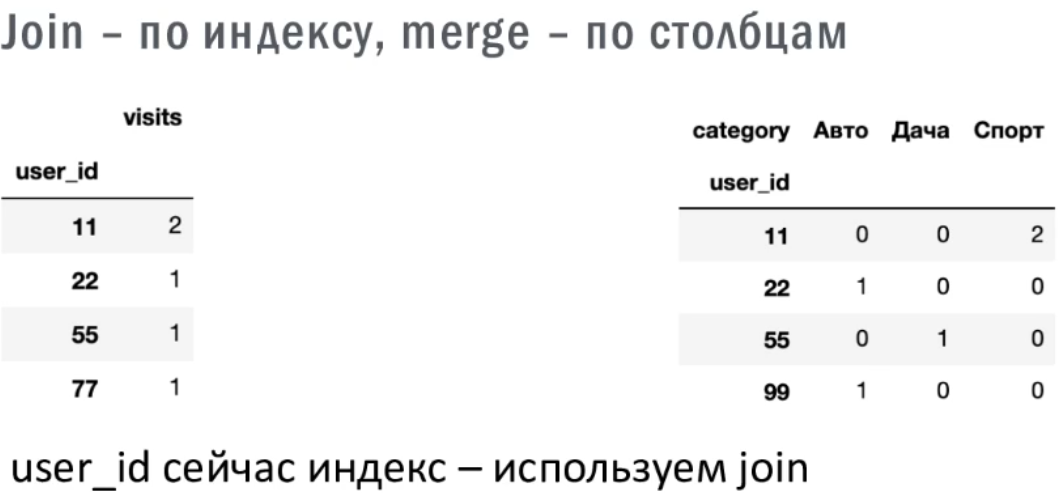

In [35]:
# 99 пользователя нет
visits_grouped.join(purchases_pivot)

,visits,Авто,Дача,Спорт
user_id,,,,
11,2,0.0,0.0,2.0
22,1,1.0,0.0,0.0
55,1,0.0,1.0,0.0
77,1,NaN,NaN,NaN


### LEFT join
Каждой строчке в левой таблице ищет соответствие в правой

In [38]:
# 99 пользователя нет
visits_grouped.join(purchases_pivot, how='left', on='user_id')

,visits,Авто,Дача,Спорт
user_id,,,,
11,2,0.0,0.0,2.0
22,1,1.0,0.0,0.0
55,1,0.0,1.0,0.0
77,1,NaN,NaN,NaN


### RIGHT join
Каждой строчке в правой таблице ищет соответствие в левой

In [37]:
# 77 пользователя нет
visits_grouped.join(purchases_pivot, how='right')

,visits,Авто,Дача,Спорт
user_id,,,,
11,2.0,0,0,2
22,1.0,1,0,0
55,1.0,0,1,0
99,NaN,1,0,0


### Упражнение
Дана статистика:
- ID клиентов и их имена (датафрейм clients)
- статистика доходов (earnings)
- статистика расходов (spending)

Определите имена клиентов, расходы которых превышают доходы.

In [42]:
# подсказка - по умолчанию в методе merge объединение НЕ left join
?pd.DataFrame.merge

In [39]:
clients = pd.DataFrame(
    {
        'id': [43018, 48329, 51043, 74943, 75029],
        'name': ['Марков Илья', 'Зарицкая Елизавета', 'Благова Дарья', 'Слепова Елена', 'Гордецкий Максим'],
    }
)

clients

,id,name
0,43018,Марков Илья
1,48329,Зарицкая Елизавета
2,51043,Благова Дарья
3,74943,Слепова Елена
4,75029,Гордецкий Максим


In [40]:
earnings = pd.DataFrame(
    {
        'id': [51043, 48329, 74943, 75029, 43018],
        'debit': [34500, 12400, 89044, 5355, 19800],
    }
)

earnings

,id,debit
0,51043,34500
1,48329,12400
2,74943,89044
3,75029,5355
4,43018,19800


In [41]:
spending = pd.DataFrame(
    {
        'id': [51043, 48329, 74943, 75029, 43018],
        'credit': [22990, 2500, 69880, 6000, 29000],
    }
)

spending

,id,credit
0,51043,22990
1,48329,2500
2,74943,69880
3,75029,6000
4,43018,29000


In [46]:
earnings.merge(spending)['debit']

0    34500
1    12400
2    89044
3     5355
4    19800
Name: debit, dtype: int64

In [48]:
bf = earnings.merge(spending).merge(clients)
bf[bf.debit < bf.credit]

,id,debit,credit,name
3,75029,5355,6000,Гордецкий Максим
4,43018,19800,29000,Марков Илья


In [49]:
bf = earnings.merge(spending, how='left').merge(clients, how='left')
bf[bf.debit < bf.credit]

,id,debit,credit,name
3,75029,5355,6000,Гордецкий Максим
4,43018,19800,29000,Марков Илья


In [55]:
earnings.merge(spending, how='left').merge(clients, how='left').apply(lambda x: x.debit<x.credit,axis=1)

0    False
1    False
2    False
3     True
4     True
dtype: bool

### INNER join
Оставляет строчки, которые есть в обеих таблицах

In [62]:
visits_grouped.join(purchases_pivot, how='inner')

,visits,Авто,Дача,Спорт
user_id,,,,
11,2,0,0,2
22,1,1,0,0
55,1,0,1,0


### Outer join
Оставляет все строчки

In [63]:
visits_grouped.join(purchases_pivot, how='outer')

,visits,Авто,Дача,Спорт
user_id,,,,
11,2.0,0.0,0.0,2.0
22,1.0,1.0,0.0,0.0
55,1.0,0.0,1.0,0.0
77,1.0,NaN,NaN,NaN
99,NaN,1.0,0.0,0.0


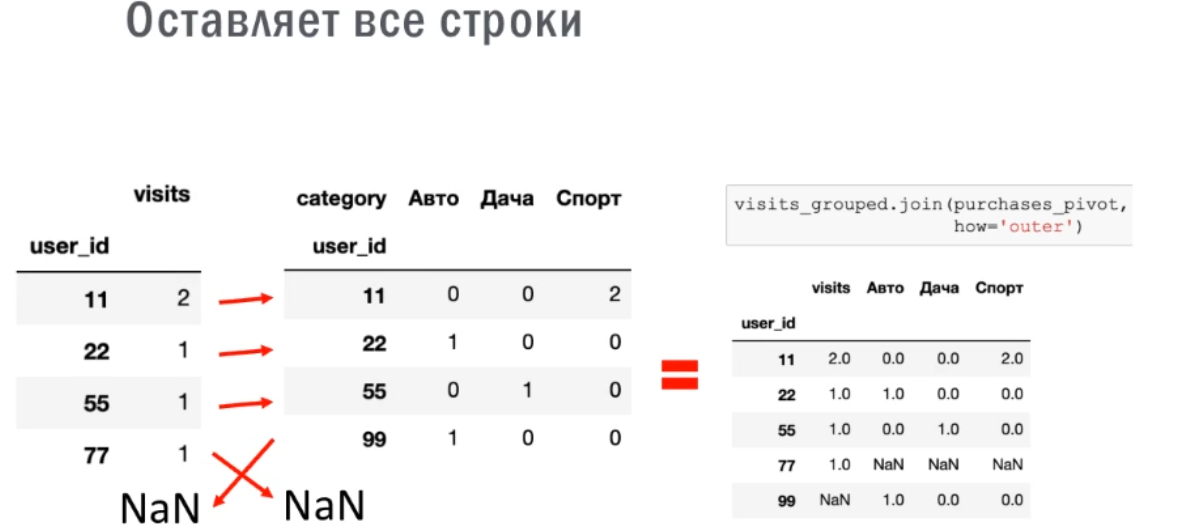

# Конкатенация таблиц

In [64]:
a = pd.DataFrame({'date': ['2020-01-01', '2020-01-02', '2020-01-03'], 'value_a': [1, 2, 3]})
b = pd.DataFrame({'date': ['2020-01-01', '2020-01-02', '2020-01-03'], 'value_b': [3, 4, 5]})

In [65]:
a

,date,value_a
0,2020-01-01,1
1,2020-01-02,2
2,2020-01-03,3


In [66]:
b

,date,value_b
0,2020-01-01,3
1,2020-01-02,4
2,2020-01-03,5


In [67]:
pd.concat([a, b])

,date,value_a,value_b
0,2020-01-01,1.0,NaN
1,2020-01-02,2.0,NaN
2,2020-01-03,3.0,NaN
0,2020-01-01,NaN,3.0
1,2020-01-02,NaN,4.0
2,2020-01-03,NaN,5.0


In [68]:
# объединение по горизонтали
pd.concat([a, b], axis=1)

,date,value_a,date,value_b
0,2020-01-01,1,2020-01-01,3
1,2020-01-02,2,2020-01-02,4
2,2020-01-03,3,2020-01-03,5


In [69]:
pd.concat([a, b], axis=1).date 

,date,date
0,2020-01-01,2020-01-01
1,2020-01-02,2020-01-02
2,2020-01-03,2020-01-03


UNION ALL

### Дубликаты при объединении таблиц

### Что полезно проверить (исходя из задачи)
1) После  LEFT-join кол-во строк не изменилось

2) Суммы числовых столбцов не изменились

3) Суммы в правой таблице неплохо тоже проверить

In [72]:
ratings = pd.read_csv('ratings_example.txt', sep = '\t')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144


In [77]:
movies = pd.read_csv('movies_example.txt', sep = '\t')
movies.head()

,movieId,title,genres
0,31,Dangerous Minds (1995),Drama
1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
2,31,Dangerous Minds (1995),Drama


In [74]:
# ¯\_(ツ)_/¯
ratings.merge(movies, how='left', on='movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,31,2.5,1260759144,Dangerous Minds (1995),Drama


In [75]:
movies.drop_duplicates(subset = 'movieId', keep = 'first', inplace = True)
movies.head()

,movieId,title,genres
0,31,Dangerous Minds (1995),Drama
1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller


In [80]:
movies.drop_duplicates(subset = 'movieId', keep = 'last', inplace = True)
movies.head()

,movieId,title,genres
1,32,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
2,31,Dangerous Minds (1995),Drama


In [ ]:
movies.drop_duplicates(subset = ['movieId', 'user_id'], keep = 'first', inplace = True)
movies.head()

In [81]:
ratings.merge(movies, how = 'left', on = 'movieId')

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama


In [82]:
ratings.merge(movies, how = 'right', on = 'movieId')

,userId,movieId,rating,timestamp,title,genres
0,NaN,32,NaN,NaN,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
1,1.0,31,2.5,1.260759e+09,Dangerous Minds (1995),Drama


### Упражнение
Объедините датафреймы с визитами и покупками на сайте по ключу date. Обратите внимание, что в датафрейме визитов имеются дубликаты по дате.

In [83]:
visits = pd.DataFrame(
    {'date': ['2019-11-01', '2019-11-01', '2019-11-02', '2019-11-02', '2019-11-03'], 
     'source': ['organic', 'paid', 'organic', 'paid', 'organic'], 
     'visits': [16825, 1952, 21890, 376, 19509]}
)

visits

,date,source,visits
0,2019-11-01,organic,16825
1,2019-11-01,paid,1952
2,2019-11-02,organic,21890
3,2019-11-02,paid,376
4,2019-11-03,organic,19509


In [84]:
orders = pd.DataFrame(
    {'date': ['2019-11-01', '2019-11-02', '2019-11-03'],
     'orders': [198, 225, 201]}
)

orders

,date,orders
0,2019-11-01,198
1,2019-11-02,225
2,2019-11-03,201


In [86]:
visits.join(orders, how='left')

ValueError: columns overlap but no suffix specified: Index(['date'], dtype='object')

In [87]:
visits.join(orders, how='left', on='date')

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat

In [110]:
j = visits.groupby(by='date')
#display(*j)
for i, *j in j:
    print(i)
    print(j)

2019-11-01
[         date   source  visits
0  2019-11-01  organic   16825
1  2019-11-01     paid    1952]
2019-11-02
[         date   source  visits
2  2019-11-02  organic   21890
3  2019-11-02     paid     376]
2019-11-03
[         date   source  visits
4  2019-11-03  organic   19509]


In [112]:
visits.groupby(by='date').agg({'visits': 'sum'})

,visits
date,
2019-11-01,18777
2019-11-02,22266
2019-11-03,19509


In [117]:
visits.groupby(by='date').sum()

/tmp/ipykernel_168791/1497361285.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  visits.groupby(by='date').sum()


,visits
date,
2019-11-01,18777
2019-11-02,22266
2019-11-03,19509


In [118]:
visits.groupby(by='date').sum(numeric_only=True)

,visits
date,
2019-11-01,18777
2019-11-02,22266
2019-11-03,19509


In [ ]:
visits.groupby(by='date').agg({'visits': 'sum'})

In [116]:
orders.merge(visits.groupby(by='date').agg({'visits': 'sum'}), how='left', on='date')

,date,orders,visits
0,2019-11-01,198,18777
1,2019-11-02,225,22266
2,2019-11-03,201,19509


In [119]:
visits.pivot_table(index='date', columns='source', values='visits', aggfunc='sum')

source,organic,paid
date,,
2019-11-01,16825.0,1952.0
2019-11-02,21890.0,376.0
2019-11-03,19509.0,NaN


In [120]:
(
    visits.
    pivot_table(index='date', columns='source', values='visits', aggfunc='sum')
    .reset_index() # возвращаем visits в столбцы из индекса
)

source,date,organic,paid
0,2019-11-01,16825.0,1952.0
1,2019-11-02,21890.0,376.0
2,2019-11-03,19509.0,NaN


In [123]:
#САМОЕ ПРАВИЛЬНО
(
    visits.
    pivot_table(index='date', columns='source', values='visits', aggfunc='sum')
    .reset_index() # возвращаем visits в столбцы из индекса
    .merge(orders, on='date', how='left')
)

,date,organic,paid,orders
0,2019-11-01,16825.0,1952.0,198
1,2019-11-02,21890.0,376.0,225
2,2019-11-03,19509.0,NaN,201


### Оптимизация хранения данных

In [139]:
# 2.4mb
ratings = pd.read_csv(path_for_datasets + 'ml-latest-small/ratings.csv')

# 0.5mb
movies = pd.read_csv(path_for_datasets + 'ml-latest-small/movies.csv')
joined = ratings.merge(movies, how='left', on='movieId')

In [140]:
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [142]:
ratings = pd.read_csv(path_for_datasets + 'ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [143]:
len(ratings)

100004

In [144]:
movies = pd.read_csv(path_for_datasets + 'ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [145]:
len(movies)

9125

In [146]:
len(ratings) == len(joined)

True

In [ ]:
joined.to_csv('joined_ratings.csv', index=False)

In [ ]:
joined.head()

In [ ]:
logs = joined[['userId', 'movieId', 'rating']].head()

In [ ]:
len(joined[['movieId', 'title', 'genres']].drop_duplicates())

### Какой жанр имеет самые высокие рейтинги?

In [147]:
import numpy as np

In [148]:
genres = ['Drama', 'Action', 'Thriller']

In [151]:
ratings = pd.read_csv(path_for_datasets + 'ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [152]:
len(ratings)

100004

In [153]:
movies = pd.read_csv(path_for_datasets + 'ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [154]:
len(movies)

9125

In [155]:
joined = ratings.merge(movies, on='movieId', how='left')
joined.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [156]:
# рекомендуемая проверка на возможные дубликаты
len(ratings) == len(joined)

True

### Считаем рейтинг жанров

In [159]:
# еще раз список жанров
genres = ['Drama', 'Action', 'Thriller']

In [160]:
def genres_ratings(row):
    """Возвращает рейтинг, если он есть в списке жанров данного фильма"""
    
    return pd.Series([row['rating'] if genre in row['genres'] else np.NaN for genre in genres])

In [161]:
%%time
joined[genres] = joined.apply(genres_ratings, axis=1)

CPU times: user 13.3 s, sys: 61.2 ms, total: 13.4 s
Wall time: 13.4 s


In [157]:
def genres_ratings_version_2(row):
    """Возвращает рейтинг, если он есть в списке жанров данного фильма"""
    
    for genre in genres:
        if genre in row.genres:
            row[genre] = row.rating
    
    return rating

In [162]:
joined[genres] = joined.apply(genres_ratings, axis=1)
joined.head()

,userId,movieId,rating,timestamp,title,genres,Drama,Action,Thriller
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,2.5,NaN,NaN
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical,3.0,NaN,NaN
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller,NaN,NaN,3.0
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller,NaN,2.0,2.0
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,4.0,NaN,NaN


### Упражнение

In [165]:
joined.genres.nunique()

901

In [166]:
joined.genres

0                                         Drama
1              Animation|Children|Drama|Musical
2                                      Thriller
3              Action|Adventure|Sci-Fi|Thriller
4                                         Drama
                          ...                  
99999                      Comedy|Drama|Romance
100000                              Documentary
100001    Action|Adventure|Sci-Fi|Thriller|IMAX
100002                                    Drama
100003                                    Drama
Name: genres, Length: 100004, dtype: object

In [172]:
t_set = set()

In [168]:
joined.genres.apply(lambda x: x.split('|'))

0                                             [Drama]
1               [Animation, Children, Drama, Musical]
2                                          [Thriller]
3               [Action, Adventure, Sci-Fi, Thriller]
4                                             [Drama]
                             ...                     
99999                        [Comedy, Drama, Romance]
100000                                  [Documentary]
100001    [Action, Adventure, Sci-Fi, Thriller, IMAX]
100002                                        [Drama]
100003                                        [Drama]
Name: genres, Length: 100004, dtype: object

In [170]:
joined.genres.apply(lambda x: x.split('|'))[0]

['Drama']

In [173]:
joined.genres.apply(lambda x: x.split('|'))[1]

['Animation', 'Children', 'Drama', 'Musical']

In [175]:
from itertools import chain
print(list(chain.from_iterable(joined.genres.apply(lambda x: x.split('|')))))

['Drama', 'Animation', 'Children', 'Drama', 'Musical', 'Thriller', 'Action', 'Adventure', 'Sci-Fi', 'Thriller', 'Drama', 'Drama', 'War', 'Action', 'Adventure', 'Drama', 'Drama', 'Fantasy', 'Horror', 'Romance', 'Thriller', 'Thriller', 'Adventure', 'Sci-Fi', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Action', 'Crime', 'Thriller', 'Action', 'Adventure', 'Sci-Fi', 'Adventure', 'Comedy', 'Action', 'Adventure', 'Fantasy', 'Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy', 'Drama', 'Horror', 'Sci-Fi', 'Thriller', 'Adventure', 'Comedy', 'Fantasy', 'Sci-Fi', 'Comedy', 'Western', 'Action', 'Adventure', 'Thriller', 'Drama', 'Romance', 'Comedy', 'Romance', 'Mystery', 'Thriller', 'Crime', 'Mystery', 'Thriller', 'Comedy', 'Drama', 'Romance', 'Drama', 'Action', 'Drama', 'War', 'Comedy', 'Adventure', 'Drama', 'IMAX', 'Action', 'Adventure', 'Comedy', 'Crime', 'Drama', 'Thriller', 'War', 'Action', 'Crime', 'Thriller', 'Action', 'Drama', 'Romance', 'Action', 'Crime', 'Thriller', 'Comedy', 'Rom

In [177]:
an = set(list(chain.from_iterable(joined.genres.apply(lambda x: x.split('|')))))

In [178]:
len(an)

20

In [ ]:
l_genres = ()
for i in joined.genres.apply(lambda x: x.split('|')):
    for j in i:

In [174]:
h = set()
h.add(joined.genres.apply(lambda x: x.split('|'))[1])
h

TypeError: unhashable type: 'list'

In [ ]:
for i in joined.genres.apply(lambda x: x.split('|')):
    t_set.add(i.)

Выведите средний рейтинг каждого жанра из списка genres

### К домашнему заданию, задача 2
Дана статистика услуг перевозок клиентов компании по типам:
- rzd - железнодорожные перевозки
- auto - автомобильные перевозки
- air - воздушные перевозки
- client_base - адреса клиентов
Необходимо сформировать две таблицы:<br>
таблицу с тремя типами выручки для каждого client_id без указания адреса клиента<br>
аналогичную таблицу по типам выручки с указанием адреса клиента<br>
Обратите внимание, что в процессе объединения таблиц данные не должны теряться.

In [179]:
rzd = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115],
        'rzd_revenue': [1093, 2810, 10283, 5774, 981]
    }
)
rzd

,client_id,rzd_revenue
0,111,1093
1,112,2810
2,113,10283
3,114,5774
4,115,981


In [180]:
auto = pd.DataFrame(
    {
        'client_id': [113, 114, 115, 116, 117],
        'auto_revenue': [57483, 83, 912, 4834, 98]
    }
)
auto

,client_id,auto_revenue
0,113,57483
1,114,83
2,115,912
3,116,4834
4,117,98


In [181]:
air = pd.DataFrame(
    {
        'client_id': [115, 116, 117, 118],
        'air_revenue': [81, 4, 13, 173]
    }
)
air

,client_id,air_revenue
0,115,81
1,116,4
2,117,13
3,118,173


In [182]:
client_base = pd.DataFrame(
    {
        'client_id': [111, 112, 113, 114, 115, 116, 117, 118],
        'address': ['Комсомольская 4', 'Энтузиастов 8а', 'Левобережная 1а', 'Мира 14', 'ЗЖБИиДК 1', 
                    'Строителей 18', 'Панфиловская 33', 'Мастеркова 4']
    }
)
client_base

,client_id,address
0,111,Комсомольская 4
1,112,Энтузиастов 8а
2,113,Левобережная 1а
3,114,Мира 14
4,115,ЗЖБИиДК 1
5,116,Строителей 18
6,117,Панфиловская 33
7,118,Мастеркова 4


In [183]:
client_base.client_id.join(rzd)

AttributeError: 'Series' object has no attribute 'join'

In [187]:
rzd.merge(auto, how='outer').merge(air, how='outer')

,client_id,rzd_revenue,auto_revenue,air_revenue
0,111,1093.0,NaN,NaN
1,112,2810.0,NaN,NaN
2,113,10283.0,57483.0,NaN
3,114,5774.0,83.0,NaN
4,115,981.0,912.0,81.0
5,116,NaN,4834.0,4.0
6,117,NaN,98.0,13.0
7,118,NaN,NaN,173.0
